# Logit Classifier

In [1]:

from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
data = pd.read_csv('data.csv')

In [3]:
X,y = data['title'],data['subreddit']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Using Pipeline and Gridsearch to tune the parameters for both Countvectorizer and Multinomial Bayes Classifier

In [4]:
pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('logreg', LogisticRegression())
    ])

In [5]:
grid = {
    'tfidf__max_features': [ 3000, 4000],
    'tfidf__min_df': [1, 2],
    'tfidf__max_df': [0.3, 0.4, 0.5],  
    'tfidf__ngram_range': [(1,1)],
    'logreg__penalty':['l2'], 
    'logreg__C': [1]
}

In [6]:
gs = GridSearchCV(pipe, param_grid = grid, verbose=1, cv= 5, n_jobs = 1 )
gs.fit(X_train, y_train)

print(f'Best Parmas: {gs.best_params_}')
print(f'Best Score: {gs.best_score_}')

print(f'Train Score: {gs.score(X_train, y_train)}')
print(f'Test Score: {gs.score(X_test, y_test)}')

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Best Parmas: {'logreg__C': 1, 'logreg__penalty': 'l2', 'tfidf__max_df': 0.3, 'tfidf__max_features': 3000, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 1)}
Best Score: 0.834
Train Score: 0.9593333333333334
Test Score: 0.834


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.9s finished
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Use the best parameters from Gridsearch to fit both the Vectorizer and the Classifier

In [7]:
tfid = TfidfVectorizer(gs.best_params_)
X_train = tfid.fit_transform(X_train,y_train)
X_test = tfid.transform(X_test)               

In [8]:
logreg = LogisticRegression(penalty = 'l2')
logreg.fit(X_train, y_train)

print(f'Intercept: {logreg.intercept_}')
print(f'Coef: {logreg.coef_}')

Intercept: [0.21181976]
Coef: [[ 0.17847808  0.4814338   0.16572388 ... -0.16041869 -0.16041869
  -0.16041869]]


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Using the coefficients to take a peek at the most predictive words. 

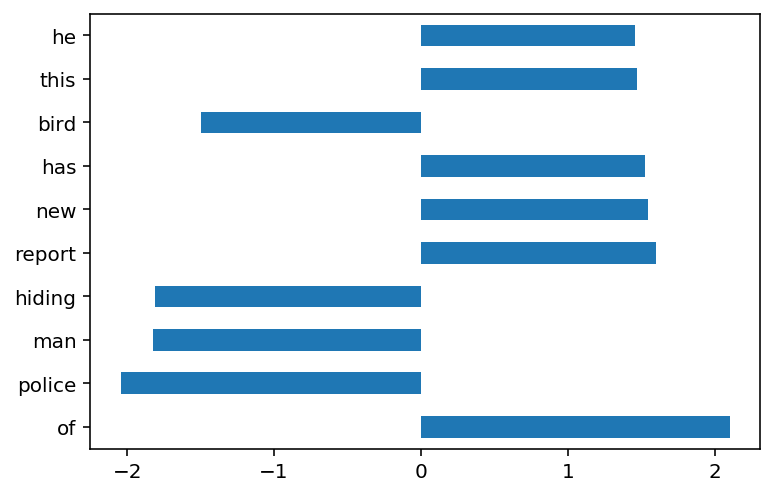

In [9]:
# J's fantastic chart example
coef_df = pd.DataFrame(logreg.coef_, columns=tfid.get_feature_names()).T
coef_df['abs_coef'] = coef_df[0].abs()
coef_df.sort_values('abs_coef', ascending=False)[0].head(10)\
.plot(kind='barh');

### Score the model

In [10]:
pred_train = logreg.predict(X_train)
pred_test = logreg.predict(X_test)

print(f'train score:{logreg.score(X_train,pred_train)}')
print(f'test score:{logreg.score(X_test, y_test)}')

train score:1.0
test score:0.834
